<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2.0_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Load Data

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

In [32]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

assert X_train.shape == (60000, 28, 28)  # (N x 28 x 28)
assert X_test.shape == (10000, 28, 28)  # (N_test x 28 x 28)
assert y_train.shape == (60000,)  # (N)
assert y_test.shape == (10000,)  # (N_test)

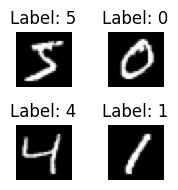

In [33]:
# Define the number of images to visualize in the grid
num_images_to_visualize = 4

# Create a 2x2 grid to display the images
fig, axes = plt.subplots(2, 2, figsize=(2, 2))

# Visualize the images
for i in range(num_images_to_visualize):
    # Get the row and column indices for the current image
    row = i // 2
    col = i % 2

    # Plot the image in the corresponding subplot
    axes[row, col].imshow(X_train[i], cmap='gray')
    axes[row, col].set_title(f"Label: {y_train[i]}")  # Display the corresponding label as the title
    axes[row, col].axis('off')  # Turn off axis labels

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Show the grid of images
plt.show()

In [34]:
# Normalize the data (RGB pixel ranging from 0-255)
X_train, X_test = X_train / 255.0, X_test / 255.0

## Part 2: Initialize the Model

In [35]:
def initialize_model():
  # architecture
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  # compile
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [36]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=8,
                    verbose=1)

Epoch 1/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.2481 - accuracy: 0.9264 - val_loss: 0.1152 - val_accuracy: 0.9627
Epoch 2/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.1278 - accuracy: 0.9616 - val_loss: 0.0864 - val_accuracy: 0.9728
Epoch 3/10
7500/7500 [==============================] - 30s 4ms/step - loss: 0.1009 - accuracy: 0.9693 - val_loss: 0.0827 - val_accuracy: 0.9726
Epoch 4/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0863 - accuracy: 0.9731 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 5/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0753 - accuracy: 0.9764 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 6/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.0766 - val_accuracy: 0.9787
Epoch 7/10
7500/7500 [==============================] - 26s 4ms/step - loss: 0.0624 - accuracy: 0.9798 - val_loss: 0.0832 - val_ac

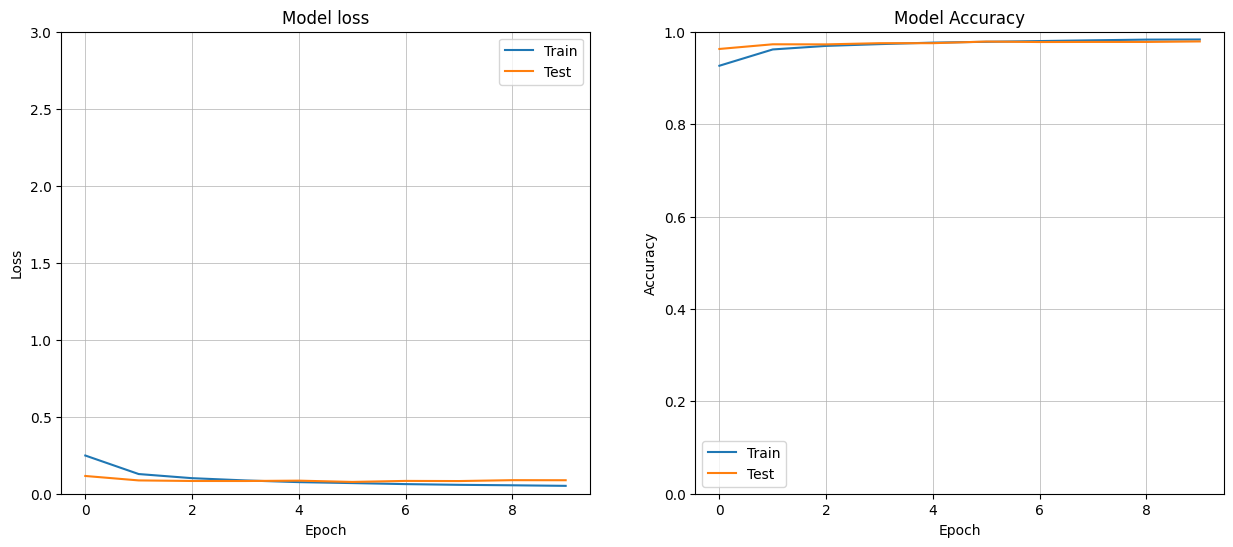

In [37]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(15,6))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(history, title=None)


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 966    1    5    1    1    0    1    3    2    0]
 [   0 1128    3    0    0    2    1    0    1    0]
 [   1    0 1019    2    1    0    1    7    1    0]
 [   0    0    8  971    0   17    0    7    4    3]
 [   1    0    1    0  967    0    2    4    1    6]
 [   2    0    0    5    1  873    4    1    5    1]
 [   2    2    0    1    8    2  939    1    3    0]
 [   1    7    9    2    0    0    0 1004    1    4]
 [   2    0    7    7    3    4    1    2  945    3]
 [   0    3    1    6    8    4    1    6    2  978]]


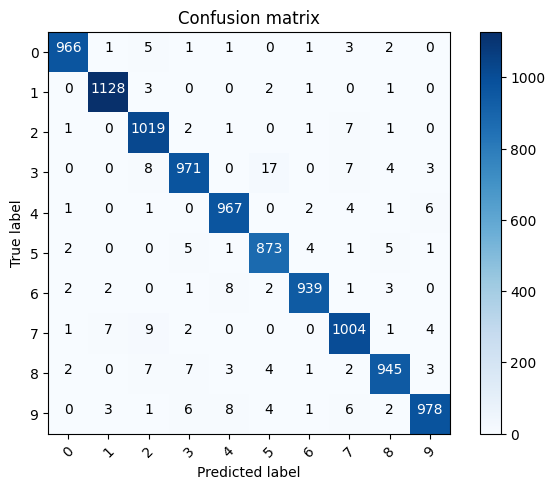

In [38]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

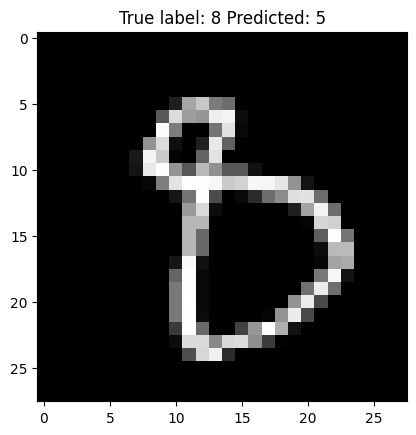

In [39]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

# Part 3: Making Predictions

In [40]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [41]:
np.round(pred).flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [42]:
# Calculate the accuracy, compare it to evaluate() output
print('Manually calculated accuracy: ', np.mean(pred == y_test))
print('Evaluate output: ', model.evaluate(X_test, y_test))


<ipython-input-42-7ffc107813f7>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('Manually calculated accuracy: ', np.mean(pred == y_test))


Manually calculated accuracy:  0.0
313/313 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9790
Evaluate output:  [0.08757371455430984, 0.9789999723434448]


In [43]:
# Evaluation
results_train = model.evaluate(X_train, y_train, verbose = 0)
results_test = model.evaluate(X_test, y_test, verbose = 0)


# Looking back at what happened during the training phase
print(f'The accuracy on the testing set is {results_test[1]:.4f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.4f}.')

The accuracy on the testing set is 0.9790...
...whereas the accuracy on the training set is 0.9932.


### Part 4: Saving the Model

In [44]:
model.save('linearclassifier_mnist.h5')

!ls -lh

total 1.2M
-rw-r--r-- 1 root root 1.2M Jul 27 19:38 linearclassifier_mnist.h5
drwxr-xr-x 1 root root 4.0K Jul 26 13:33 sample_data


In [45]:
from keras.models import load_model

# Load the model & check if it still works
model = load_model('linearclassifier_mnist.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<keras.layers.reshaping.flatten.Flatten object at 0x783a62c8e410>, <keras.layers.core.dense.Dense object at 0x783a62c8e7a0>, <keras.layers.regularization.dropout.Dropout object at 0x783a62c8fc40>, <keras.layers.core.dense.Dense object at 0x783a62c8eaa0>]
313/313 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9790


[0.08757371455430984, 0.9789999723434448]

In [46]:
from google.colab import files
files.download('linearclassifier_mnist.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>